In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

DATA : 348 records, 1 column. 
It represents the number of employees in thousands of persons as monthly averages from January 1990 to December 2018.

In [148]:
data = pd.read_csv('Desktop/Hospitality Employees.csv',index_col='Date',parse_dates=True)
data.tail()

,Employees
Date,
2018-08-01,2019.1
2018-09-01,1992.5
2018-10-01,1984.3
2018-11-01,1990.1
2018-12-01,2000.2


In [149]:
data.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=348, freq=None)

In [150]:
data.index.freq='MS'

# PLOT

<AxesSubplot:xlabel='Date'>

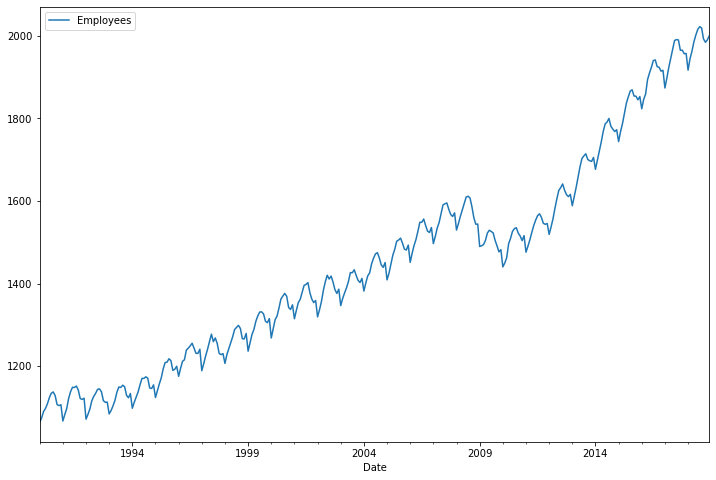

In [151]:
data.plot(figsize=(12,8))

Seasonality and trend is observed in the above plot for better understanding let's do ETS Decomposition

# ETS DECOMPOSITION

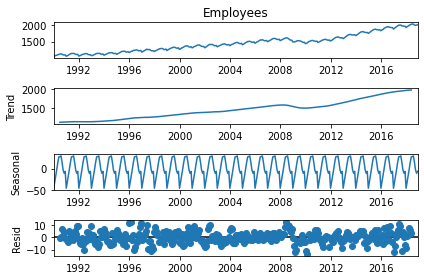

In [152]:
d = seasonal_decompose(data['Employees'],model='additive',period=12)
d.plot();

# Augmented Dickey Fuller Test

In [153]:
dftest = adfuller(data['Employees']) 
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistic','p.value','#lags used','#observations'])

In [154]:
for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [155]:
dfout

ADF Test Statistic        0.901284
p.value                   0.993107
#lags used               17.000000
#observations           330.000000
critical value (1%)      -3.450322
critical value (5%)      -2.870338
critical value (10%)     -2.571458
dtype: float64

p>0.05 and test statistic>critical values(data is not stationary)

It is difficult to interpret the orders by looking at ACF and PACF plots. So, lets obtain the orders by auto arima.

# OBTAIN RECOMMENDED ORDERS

In [156]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [157]:
a = auto_arima(data['Employees'],seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2213.323, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2974.636, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2707.381, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2980.790, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2340.935, Time=0.54 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2224.216, Time=2.18 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2258.332, Time=2.43 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2264.870, Time=1.29 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2227.502, Time=0.56 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2

In [158]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Tue, 13 Dec 2022   AIC                           2208.504
Time:                                      13:41:25   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9248      0.045     20.613      0.000       0.837       1.013
ma.L1         -0.9443      0.070    -13.542      0.000      -1.081      -0.808
ma.L2          0.1286      0.060      2.146      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    704.926      0.000       0.994       1.000
ma.S.L12      -0.7491      0.043    -17.348      0.000      -0.834      -0.665
sigma2        29.3011      1.718     17.054      0.000      25.934      32.669
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

auto_arima suggests ARIMA order(1,1,2) with seasonal order(1,0,1,12)

# TRAIN-TEST SPLIT

In [159]:
len(data)

348

In [160]:
train = data.iloc[:-12]
test = data.iloc[-12:]

# MODEL FIT

fit SARIMAX(1, 1, 2)x(1, 0, [1], 12) model to the train set

In [161]:
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1,0,1,12)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Tue, 13 Dec 2022   AIC                           2128.116
Time:                                      13:41:26   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9240      0.044     21.170      0.000       0.838       1.010
ma.L1         -0.9584      0.070    -13.778      0.000      -1.095      -0.822
ma.L2          0.1500      0.060      2.491      0.013       0.032       0.268
ar.S.L12       0.9973      0.001    731.029      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.168      0.000      -0.838      -0.666
sigma2        28.7641      1.684     17.083      0.000      25.464      32.064
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.31
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# OBTAIN PREDICTED VALUES

In [162]:
start=len(train)
end=len(train)+len(test)-1
predictions=model.predict(start,end,dynamic=False)

In [163]:
predictions

2018-01-01    1922.288017
2018-02-01    1941.848068
2018-03-01    1959.857290
2018-04-01    1983.208506
2018-05-01    2002.914313
2018-06-01    2019.447014
2018-07-01    2026.312144
2018-08-01    2028.253186
2018-09-01    2009.872627
2018-10-01    2004.781341
2018-11-01    1996.728947
2018-12-01    2000.531988
Freq: MS, Name: predicted_mean, dtype: float64

compare predicted values to the actual values

In [164]:
#INCORRECT
#for i in range(predictions):
#print(f"predicted={predictions[i][1]},expected={test['Employees'][i]}")

# plot - predictions against known values

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Count of People')]

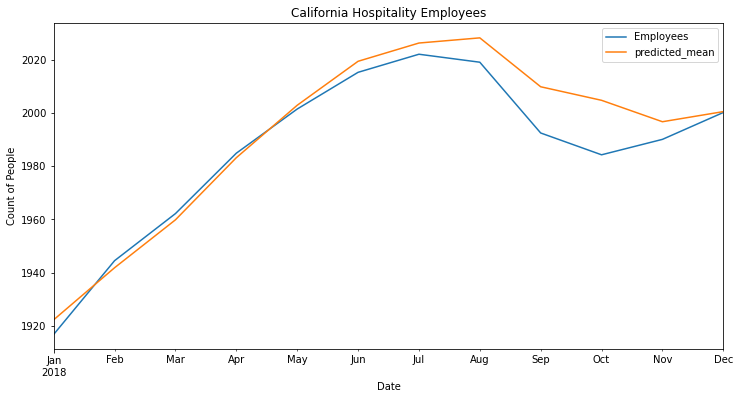

In [165]:
x = test['Employees'].plot(legend=True,figsize=(12,6),title = 'California Hospitality Employees',xlabel = 'Date',ylabel = 'Count of People')
y = predictions.plot(legend=True)
x.set(xlabel=xlabel,ylabel=ylabel)

# EVALUATION METRICS

In [166]:
mse = mean_squared_error(predictions,test['Employees'])
rmse = rmse(predictions,test['Employees'])
mse,rmse

(77.63067734433234, 8.810827279224826)

In [167]:
test.mean()
#mse,rmse betetr compared with the mean of test data

Employees    1986.125
dtype: float64

# Retrain the model and forecast one year into future

In [168]:
model = SARIMAX(data['Employees'],order=(1, 1, 2),seasonal_order=(1,0,1,12)).fit()

In [169]:
start = len(data)
end = len(data)+11
predictions = model.predict(start,end,dynamic=False)

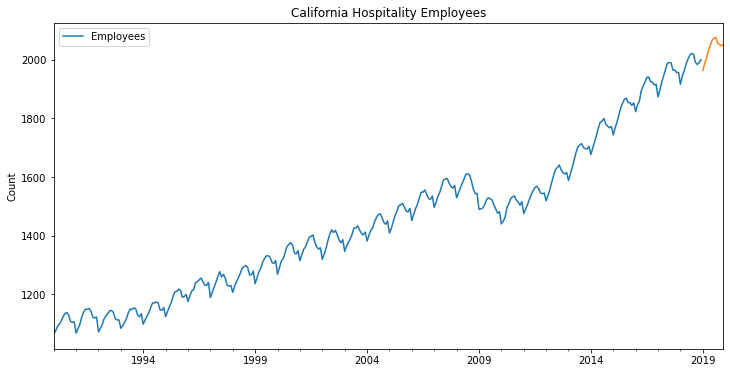

In [170]:
x = data.plot(figsize=(12,6),xlabel='',title='California Hospitality Employees',ylabel='Count')
y = predictions.plot()

# ...........